In [ ]:
#!wget https://www.dropbox.com/s/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv?dl=0 -O example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv

--2023-09-29 07:06:44--  https://www.dropbox.com/s/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv [following]
--2023-09-29 07:06:45--  https://www.dropbox.com/s/raw/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb3d6114874ced0bf45c23f7818.dl.dropboxusercontent.com/cd/0/inline/CEpwOKin0ZQigW3wsoYWbd8LKNa7814oX3k7Q7iXAtNh_OUQni-HqA8pbTdSIPJ0WXH-ht7mhS0OH6wALSSiZGKGNJdcTf_rgiTy0nGmQkM7WFcDn3RDqPDzOETHlY9qGuQ/file# [following]
--2023-09-29 07:06:45--  https://ucb3d611487

In [ ]:
# Importando librerías y datos
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('/content/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv',sep=" ",usecols=['fPhot','fArrivalTime'])

In [ ]:
print(len(df))

9965440


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap="Greens")

,fPhot,fArrivalTime
fPhot,1.000000,0.027845
fArrivalTime,0.027845,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler().fit(df.values)

df = pd.DataFrame(escalador.transform(df.values),
                       columns=["fPhot", "fArrivalTime"])

kmeans = KMeans(n_clusters=4).fit(df.values)

df["cluster"] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


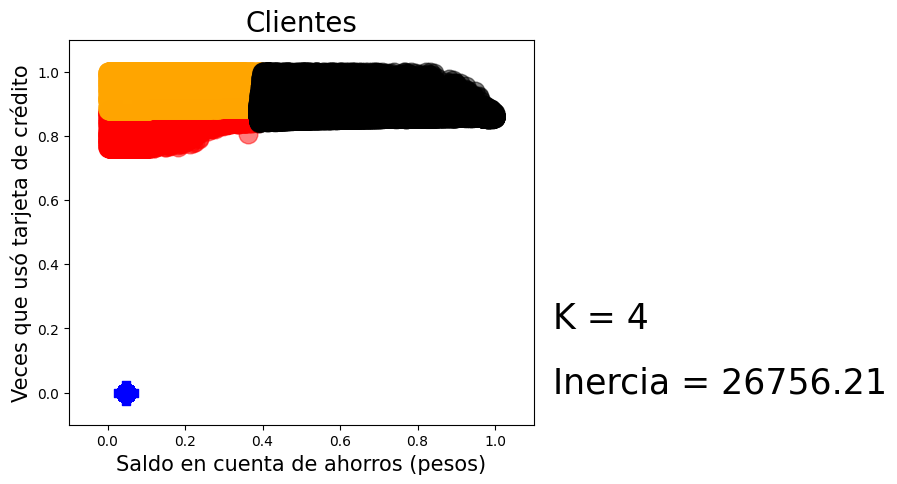

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(df[df["cluster"] == cluster]["fPhot"],
                df[df["cluster"] == cluster]["fArrivalTime"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

del df["cluster"]

### Metodo de Codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

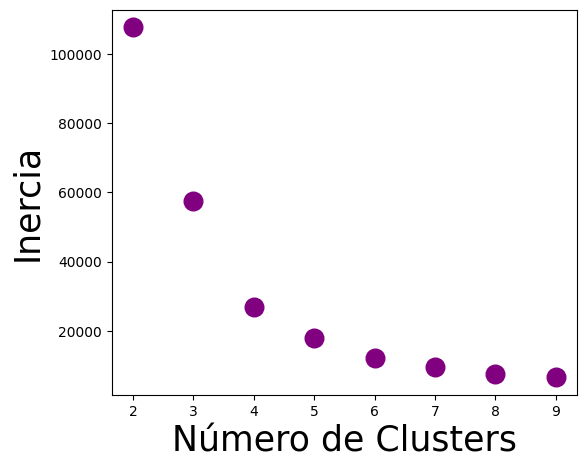

In [ ]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df.values)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()